In [38]:
from numpy import load
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit



nu
[  0.47317561   0.47364167   0.47410864 ... 236.37079595 236.50620759
 236.64158153]
Tsig
[ 0.00000000e+00 -8.56770291e-09 -8.51986238e-09 ...  2.65184016e-03
  2.64729438e-03  2.64276187e-03]


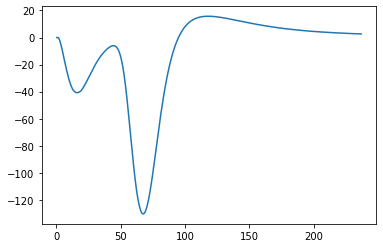

In [46]:
data = load("signal.npz")
lst = data.files
for item in lst:
    print(item)
    print(data[item])
nu = data['nu']
nu6 = data['nu']*1E6    #nu6 is in units of Hz, used for easy calculation
Tsig = data['Tsig']
Tsig3 = data['Tsig']*1E3    # Tsig3 is in units of mK.
plt.plot(nu,Tsig3)
#print(Tsig3)

In [47]:
nu0 = 20E6 #hz
def func(x,a,b):
    return (40000+a)*(x/nu0)**(-2.5+b)             #without pre weighting with nu^(-2.5)
def func2(x,a,b):
    return ((40000+a)*(x/nu0)**(-2.5+b))/x**(-2.5)    #with pre weighting with nu^(-2.5)

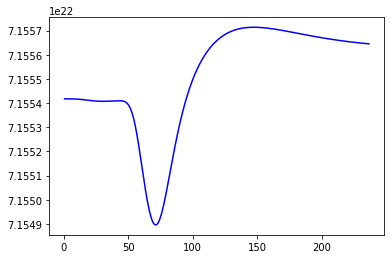

In [48]:
T2 = func(nu6,0,0)                                 #T2 is the foreground from trivial power law
Tdata = (T2 + Tsig)/nu6**(-2.5)                    # Tdata is foreground + signal, and scaled by nu6^(-2.5)
#print(Tdata)
plt.plot(nu,Tdata,'b-',label = 'data')

In [49]:
popt,pcov = curve_fit(func2,nu6,Tdata)             #curve-fitting done with the scaling of nu6^(-2.5)
popt

array([3.65195178e-01, 4.43617068e-06])

# I have a query based on the plots below with a statement explaining what each plot represents, and at the end the main query.


1. Below plot is between the fitting after the scaling with nu6^(-2.5) and the scaled foreground + signal(Tdata). Here I can see the fitting is not a line but near to be a line, since its scaled, the magnitude is way larger than I imagined it would be. But the data looks similar to the main signal of interest.

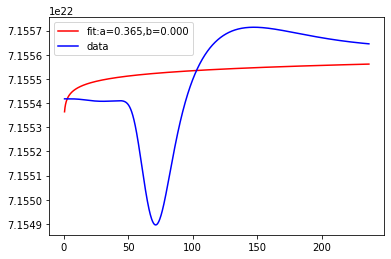

In [50]:
plt.plot(nu,func2(nu6,*popt),'r-',label = 'fit:a=%5.3f,b=%5.3f' %tuple(popt))
plt.plot(nu,Tdata,'b-',label = 'data')
plt.legend()

2. Here I plotted the same two lines, but the scaling is removed, which removed the lower freqeuncy dominance, and hence here the foreground signal is dominating. I'm not sure how scaling could affect in such a huge way.

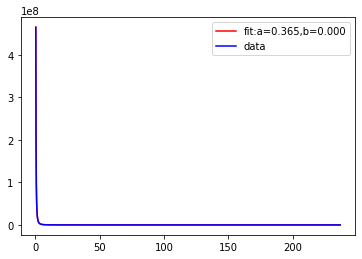

In [51]:
plt.plot(nu,func2(nu6,*popt)*nu6**(-2.5),'r-',label = 'fit:a=%5.3f,b=%5.3f' %tuple(popt))
plt.plot(nu,Tdata*nu6**(-2.5),'b-',label = 'data')
plt.legend()

3. In the below plot, I tried plotting (Fitted curve(unscaled) - foreground) to see how it would look like compared to the signal of interest, but here the orders are so off for both the curves that I cannot interpret anything from this.

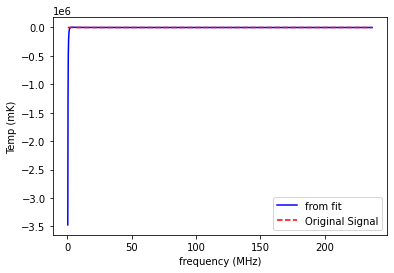

In [45]:
fit = func2(nu6,*popt)*nu6**(-2.5)
Tsig_fit = (fit - T2)*1e3
plt.plot(nu,Tsig_fit,'b-',label='from fit')
plt.plot(nu,Tsig3,'r--',label = 'Original Signal')
plt.xlabel("frequency (MHz)")
plt.ylabel("Temp (mK)")
plt.legend()

Summing up my queries: How is it that plotting the same thing in 3 different ways, gave me three different outlooks which I cannot combine to form a uniform decision? Did I plot it wrong or was it supposed to be this way?